In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
import io
%cd "\Users\Ashish\Documents\HR Analytics Classification AnalyticsVidhya"

C:\Users\Ashish\Documents\HR Analytics Classification AnalyticsVidhya


In [136]:
hrtrain=pd.read_csv("train_LZdllcl.csv")

In [137]:
hrtest=pd.read_csv("test_2umaH9m.csv")

In [138]:
hrtrain.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [139]:
hrtest.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [140]:
# Missing Values
hrtrain.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [141]:
hrtest.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [142]:
print(hrtrain.shape)
print(hrtest.shape)
# Test data does not have the dependent variable
# which needs to be predicted using train model

(54808, 14)
(23490, 13)


In [143]:
hrtest['is_promoted']='test'

In [144]:
combinedf=pd.concat([hrtrain,hrtest],axis=0)
# axis=0 Row Wise concatenation

In [145]:
combinedf.shape

(78298, 14)

In [146]:
combinedf.isnull().sum().sort_values(ascending=False)

previous_year_rating    5936
education               3443
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [147]:
combinedf.previous_year_rating.value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [148]:
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(3)

In [149]:
combinedf.previous_year_rating.value_counts()

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [150]:
combinedf.education.value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [151]:
combinedf.education=combinedf.education.fillna("Bachelor's")

In [152]:
combinedf.education.value_counts()

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [153]:
combinedf.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [154]:
combinedf.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [155]:
labelcols=combinedf[['department','region','education','gender','recruitment_channel','previous_year_rating','KPIs_met >80%','awards_won?']]

In [156]:
numericcols=combinedf.drop(['department','region','education','gender','recruitment_channel','previous_year_rating','KPIs_met >80%','awards_won?'],axis=1)

In [157]:
print(pd.DataFrame(labelcols).shape)
print(pd.DataFrame(numericcols).shape)

(78298, 8)
(78298, 6)


In [158]:
from sklearn.preprocessing import LabelEncoder

In [159]:
le=LabelEncoder()

In [160]:
labelcolsdummy=labelcols.apply(le.fit_transform)

In [161]:
labelcolsdummy.head()

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,7,31,2,0,2,4,1,0
1,4,14,0,1,0,4,0,0
2,7,10,0,1,2,2,0,0
3,7,15,0,1,0,0,0,0
4,8,18,0,1,0,2,0,0


In [162]:
combinedfclean=pd.concat([numericcols,labelcolsdummy],axis=1)
# axis=1 is column wise concactenation

In [163]:
combinedfclean.head()

,employee_id,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,65438,1,35,8,49,0,7,31,2,0,2,4,1,0
1,65141,1,30,4,60,0,4,14,0,1,0,4,0,0
2,7513,1,34,7,50,0,7,10,0,1,2,2,0,0
3,2542,2,39,10,50,0,7,15,0,1,0,0,0,0
4,48945,1,45,2,73,0,8,18,0,1,0,2,0,0


In [164]:
# splitting data into train and test data
hrtraindf=combinedfclean[combinedfclean.is_promoted!='test']
hrtestdf=combinedfclean[combinedfclean.is_promoted=='test']
print(hrtraindf.shape)
print(hrtestdf.shape)

(54808, 14)
(23490, 14)


In [165]:
# Dropping 
hrtestdf=hrtestdf.drop('is_promoted',axis=1)
print(hrtestdf.shape)

(23490, 13)


In [166]:
# split train data frame into dependent variable (y) and independent 
# variables (X)
y=hrtraindf.is_promoted
X=hrtraindf.drop(['is_promoted','employee_id'],axis=1)

In [167]:
# check for multicollinearity
X.corr()

,no_of_trainings,age,length_of_service,avg_training_score,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
no_of_trainings,1.000000,-0.081278,-0.057275,0.042517,0.014152,-0.004590,-0.033469,0.084501,-0.010405,-0.061564,-0.045576,-0.007628
age,-0.081278,1.000000,0.657111,-0.048380,0.079162,-0.088918,0.339966,-0.016293,-0.011400,0.026810,-0.025592,-0.008169
length_of_service,-0.057275,0.657111,1.000000,-0.038122,0.059060,-0.058939,0.233666,-0.019675,-0.002887,0.023504,-0.077693,-0.039927
avg_training_score,0.042517,-0.048380,-0.038122,1.000000,-0.251626,0.023572,0.032787,-0.024494,-0.002416,0.071926,0.078391,0.072138
department,0.014152,0.079162,0.059060,-0.251626,1.000000,-0.020592,0.043441,-0.030108,0.004732,-0.135561,-0.088209,-0.002151
region,-0.004590,-0.088918,-0.058939,0.023572,-0.020592,1.000000,-0.003815,0.019730,-0.000920,-0.005977,-0.007664,0.000307
education,-0.033469,0.339966,0.233666,0.032787,0.043441,-0.003815,1.000000,-0.032368,-0.003564,0.027393,0.012123,-0.001409
gender,0.084501,-0.016293,-0.019675,-0.024494,-0.030108,0.019730,-0.032368,1.000000,0.006567,-0.024024,-0.037400,0.002381
recruitment_channel,-0.010405,-0.011400,-0.002887,-0.002416,0.004732,-0.000920,-0.003564,0.006567,1.000000,0.005731,-0.000297,-0.005510
previous_year_rating,-0.061564,0.026810,0.023504,0.071926,-0.135561,-0.005977,0.027393,-0.024024,0.005731,1.000000,0.337367,0.026587


In [168]:
# Test Null is there association between gender and is_promoted?
pd.crosstab(hrtraindf.gender,hrtraindf.is_promoted)

is_promoted,0,1
gender,,
0,14845,1467
1,35295,3201


In [169]:
from scipy.stats import chi2_contingency

In [170]:
chi2_contingency(pd.crosstab(hrtraindf.gender,hrtraindf.is_promoted))
# since p-value = 0.009765091521176657 is less than 0.05, Reject NUll
# Hence there is an association or relation

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428,  1389.29382572],
        [35217.29382572,  3278.70617428]]))

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
y=le.fit_transform(y)

In [193]:
logistic=LogisticRegression(max_iter=500)

In [194]:
logisticmodel=logistic.fit(X,y)

In [175]:
logisticmodel.score(X,y) # Accuracy based on CONFUSION MATRIX

0.9172201138519924

In [176]:
logisticpredict=logisticmodel.predict(X)

In [177]:
pd.crosstab(y,logisticpredict)

col_0,0,1
row_0,,
0,49948,192
1,4345,323


In [178]:
(49948+323)/(49948+192+4345+323)

0.9172201138519924

In [179]:
logisticmodel.intercept_

array([-6.79565902])

In [180]:
logisticmodel.coef_

array([[-0.18784861, -0.02070929,  0.02429167,  0.04611319,  0.08267783,
         0.00240665,  0.10281865,  0.01271792,  0.00817165,  0.33483348,
         1.28175059,  1.90336045]])

In [181]:
coefs=pd.DataFrame(logisticmodel.coef_,columns=X.columns)

In [182]:
coefs.transpose()

,0
no_of_trainings,-0.187849
age,-0.020709
length_of_service,0.024292
avg_training_score,0.046113
department,0.082678
region,0.002407
education,0.102819
gender,0.012718
recruitment_channel,0.008172
previous_year_rating,0.334833


In [183]:
X2=hrtraindf[['no_of_trainings','age','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']]

In [184]:
logisticmodel2=logistic.fit(X2,y)

In [185]:
logisticmodel2.intercept_

array([-5.6736468])

In [186]:
logisticmodel2.coef_

array([[-0.20473053, -0.01311285,  0.03166277,  1.51037795,  1.85601324,
         0.04420022]])

In [187]:
from sklearn.metrics import classification_report

In [188]:
print(classification_report(y,logisticpredict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.63      0.07      0.12      4668

    accuracy                           0.92     54808
   macro avg       0.77      0.53      0.54     54808
weighted avg       0.90      0.92      0.89     54808



In [189]:
hrtestdf=hrtestdf.drop('employee_id',axis=1)

In [195]:
testpredict=logisticmodel.predict(hrtestdf)

In [196]:
pd.DataFrame(testpredict).to_csv("logistic02.csv")

In [197]:
from sklearn.metrics import plot_roc_curve

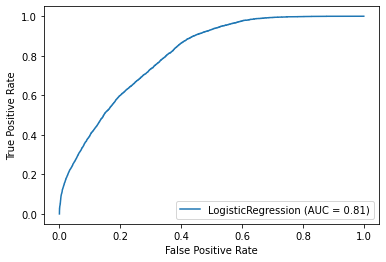

In [204]:
plot_roc_curve(logistic,X,y)